In [ ]:
Simport networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

from google.colab import files
data  = pd.read_csv('youtube.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
None


In [ ]:
data.dropna()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
5,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
...,...,...,...,...,...,...,...
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


In [ ]:
import pandas as pd
import networkx as nx

# Load data dari file CSV
file_path = "youtube.csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Membuat graf
G = nx.Graph()

# Menambahkan nodes: Setiap YouTube channel adalah node
for _, row in data.iterrows():
    G.add_node(row['Youtuber'], subscribers=row['subscribers'], views=row['video views'])

# Menambahkan edges: Relasi antar kanal berdasarkan kategori yang sama
for category, group in data.groupby('category'):
    channels = list(group['Youtuber'])
    for i in range(len(channels)):
        for j in range(i + 1, len(channels)):
            G.add_edge(channels[i], channels[j])

# Menghitung jumlah node, edge, dan kepadatan jaringan
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print("Jumlah Node:", num_nodes)
print("Jumlah Edge:", num_edges)
print("Kepadatan Jaringan:", density)


Jumlah Node: 999
Jumlah Edge: 71585
Kepadatan Jaringan: 0.1436005143419973


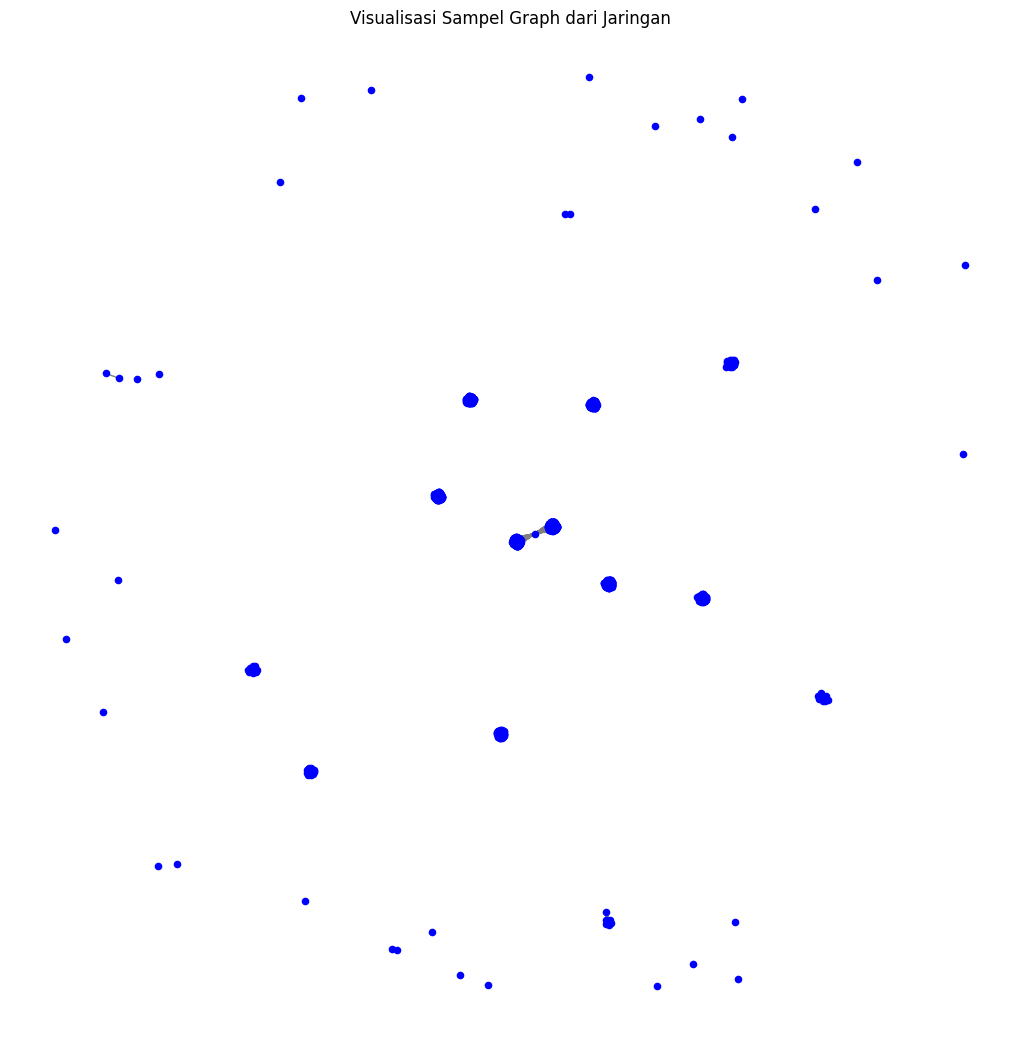

In [ ]:
subgraph = G.subgraph(list(G.nodes))

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, node_size=20, edge_color="grey", node_color="blue", with_labels=False)
plt.title("Visualisasi Sampel Graph dari Jaringan")
plt.show()

In [ ]:
data.head(30)

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
5,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
6,7,MrBeast,"102,000,000","16,832,456,681",726,Entertainment,2012
7,8,✿ Kids Diana Show,"99,700,000","79,602,288,245","1,009",People & Blogs,2015
8,9,Like Nastya,"99,200,000","81,963,845,811",702,People & Blogs,2016
9,10,Gaming,"92,700,000",0,0,NaN,2013


In [ ]:
betweenness = nx.betweenness_centrality(graph)
sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)

# Print the top 30 nodes with the highest betweenness centrality
print("Top 30 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness[:30]:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

Top 30 nodes by betweenness centrality:
Node: 11,100,000, Betweenness Centrality: 0.00025495152278902394
Node: 12,400,000, Betweenness Centrality: 0.0002306704253805455
Node: 11,800,000, Betweenness Centrality: 0.00020760338284249094
Node: 11,300,000, Betweenness Centrality: 0.00018575039517486033
Node: 11,200,000, Betweenness Centrality: 0.00016511146237765362
Node: 14,500,000, Betweenness Centrality: 0.00014447252958044691
Node: 13,400,000, Betweenness Centrality: 0.00012747576139451197
Node: 12,800,000, Betweenness Centrality: 0.00012747576139451197
Node: 12,600,000, Betweenness Centrality: 0.00012747576139451197
Node: 11,900,000, Betweenness Centrality: 0.00012747576139451197
Node: 11,700,000, Betweenness Centrality: 0.00012747576139451197
Node: 11,400,000, Betweenness Centrality: 0.00012747576139451197
Node: 11,000,000, Betweenness Centrality: 0.00011047899320857705
Node: 14,400,000, Betweenness Centrality: 9.469627989306604e-05
Node: 12,900,000, Betweenness Centrality: 9.46962798

In [ ]:
import networkx as nx
import csv

# Path to the CSV file
file_path = "youtube.csv"

# Create an empty graph
G = nx.Graph()

# Read the CSV file and add edges to the graph
with open(file_path, "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip header if exists
    for row in reader:
        # Assuming the first two columns are 'source' and 'target'
        # Adjust column indices if necessary
        source, target = row[0], row[1]

        # Check if source and target are numeric and convert if necessary
        if source.isdigit():
            source = int(source)
        if target.isdigit():
            target = int(target)

        G.add_edge(source, target)

# Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)

# Sort edges by betweenness centrality in descending order
sorted_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

# Print sorted results vertically
for edge, betweenness in sorted_betweenness:
    print(f"Edge: {edge}, Betweenness: {betweenness}")


Edge: (125, 'Bollywood Classics'), Betweenness: 1.0015017518769395e-06
Edge: ('Bollywood Classics', 579), Betweenness: 1.0015017518769395e-06
Edge: (1, 'T-Series'), Betweenness: 5.007508759384698e-07
Edge: (2, 'YouTube Movies'), Betweenness: 5.007508759384698e-07
Edge: (3, 'Cocomelon - Nursery Rhymes'), Betweenness: 5.007508759384698e-07
Edge: (4, 'SET India'), Betweenness: 5.007508759384698e-07
Edge: (5, 'Music'), Betweenness: 5.007508759384698e-07
Edge: (6, 'PewDiePie'), Betweenness: 5.007508759384698e-07
Edge: (7, 'MrBeast'), Betweenness: 5.007508759384698e-07
Edge: (8, '✿ Kids Diana Show'), Betweenness: 5.007508759384698e-07
Edge: (9, 'Like Nastya'), Betweenness: 5.007508759384698e-07
Edge: (10, 'Gaming'), Betweenness: 5.007508759384698e-07
Edge: (11, 'WWE'), Betweenness: 5.007508759384698e-07
Edge: (12, 'Zee Music Company'), Betweenness: 5.007508759384698e-07
Edge: (13, 'Vlad and Niki'), Betweenness: 5.007508759384698e-07
Edge: (14, '5-Minute Crafts'), Betweenness: 5.0075087593846

In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import csv

# Path to the CSV file
file_path = "youtube.csv"

# Create an empty graph
G = nx.Graph()

# Read the CSV file and add edges to the graph
with open(file_path, "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip header if exists
    for row in reader:
        # Assuming the first two columns are 'source' and 'target'
        source, target = row[0], row[1]

        # Convert source and target to strings to ensure consistency
        source = str(source)  # Convert to string
        target = str(target)  # Convert to string

        G.add_edge(source, target)

# Fungsi untuk menghitung modularitas
def calculate_modularity(graph, communities):
    # Check if the graph has edges before calculating modularity
    if graph.number_of_edges() > 0:
        return nx.community.modularity(graph, communities)
    else:
        return 0  # Return 0 if the graph has no edges

# Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)

# Sort edges by betweenness centrality in descending order
sorted_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

# Menghitung modularitas awal
initial_communities = greedy_modularity_communities(G)
initial_modularity = calculate_modularity(G, list(initial_communities))

print("Modularitas awal:", initial_modularity)

# Hapus edge dengan betweenness tertinggi dan hitung modularitas baru
for edge, betweenness in sorted_betweenness:
    if G.has_edge(*edge):
        G.remove_edge(*edge)

        new_communities = greedy_modularity_communities(G)
        new_modularity = calculate_modularity(G, list(new_communities))

        print(f"Setelah menghapus edge {edge} (betweenness: {betweenness}):")
        print("Modularitas baru:", new_modularity)

Modularitas awal: 0.998997999999993
Setelah menghapus edge ('125', 'Bollywood Classics') (betweenness: 1.0015017518769395e-06):
Modularitas baru: 0.9989989989989888
Setelah menghapus edge ('Bollywood Classics', '579') (betweenness: 1.0015017518769395e-06):
Modularitas baru: 0.998997995991967
Setelah menghapus edge ('1', 'T-Series') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.998996990972939
Setelah menghapus edge ('2', 'YouTube Movies') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.9989959839357319
Setelah menghapus edge ('3', 'Cocomelon - Nursery Rhymes') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.9989949748743888
Setelah menghapus edge ('4', 'SET India') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.9989939637826855
Setelah menghapus edge ('5', 'Music') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.9989929506545646
Setelah menghapus edge ('6', 'PewDiePie') (betweenness: 5.007508759384698e-07):
Modularitas baru: 0.998991

Modularity: 0.998997999999993
Number of communities: 999


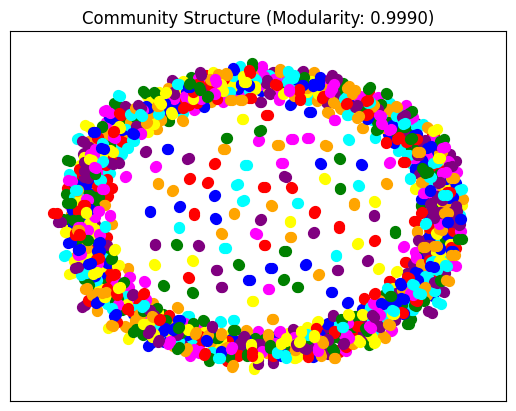

In [ ]:
# prompt: dengan modularitas maksimal berapa komunitas yang dihasilkan beserta visualisasinya

import networkx as nx
import csv
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Path to the CSV file
file_path = "youtube.csv"

# Create an empty graph
G = nx.Graph()

# Read the CSV file and add edges to the graph
with open(file_path, "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        source, target = row[0], row[1]
        G.add_edge(source, target)

# Compute communities with greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

# Calculate modularity
modularity = nx.community.modularity(G, communities)
print(f"Modularity: {modularity}")
print(f"Number of communities: {len(communities)}")

# Visualize the communities
pos = nx.spring_layout(G)  # Use a layout algorithm
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta'] # Add more colors if needed

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=50)

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title(f"Community Structure (Modularity: {modularity:.4f})")
plt.show()

Jumlah komunitas dengan modularitas maksimal: 999
Komunitas 1: ['125', 'Bollywood Classics', '579']
Komunitas 2: ['1', 'T-Series']
Komunitas 3: ['YouTube Movies', '2']
Komunitas 4: ['3', 'Cocomelon - Nursery Rhymes']
Komunitas 5: ['SET India', '4']
Komunitas 6: ['5', 'Music']
Komunitas 7: ['6', 'PewDiePie']
Komunitas 8: ['7', 'MrBeast']
Komunitas 9: ['✿ Kids Diana Show', '8']
Komunitas 10: ['Like Nastya', '9']
Komunitas 11: ['Gaming', '10']
Komunitas 12: ['WWE', '11']
Komunitas 13: ['Zee Music Company', '12']
Komunitas 14: ['Vlad and Niki', '13']
Komunitas 15: ['14', '5-Minute Crafts']
Komunitas 16: ['BLACKPINK', '15']
Komunitas 17: ['16', 'Sports']
Komunitas 18: ['17', 'Goldmines']
Komunitas 19: ['Sony SAB', '18']
Komunitas 20: ['19', 'BANGTANTV']
Komunitas 21: ['Justin Bieber', '20']
Komunitas 22: ['HYBE LABELS', '21']
Komunitas 23: ['Canal KondZilla', '22']
Komunitas 24: ['Zee TV', '23']
Komunitas 25: ['Shemaroo Filmi Gaane', '24']
Komunitas 26: ["Pinkfong Baby Shark - Kids' Songs &

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53916 (\N{HANGUL SYLLABLE TYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

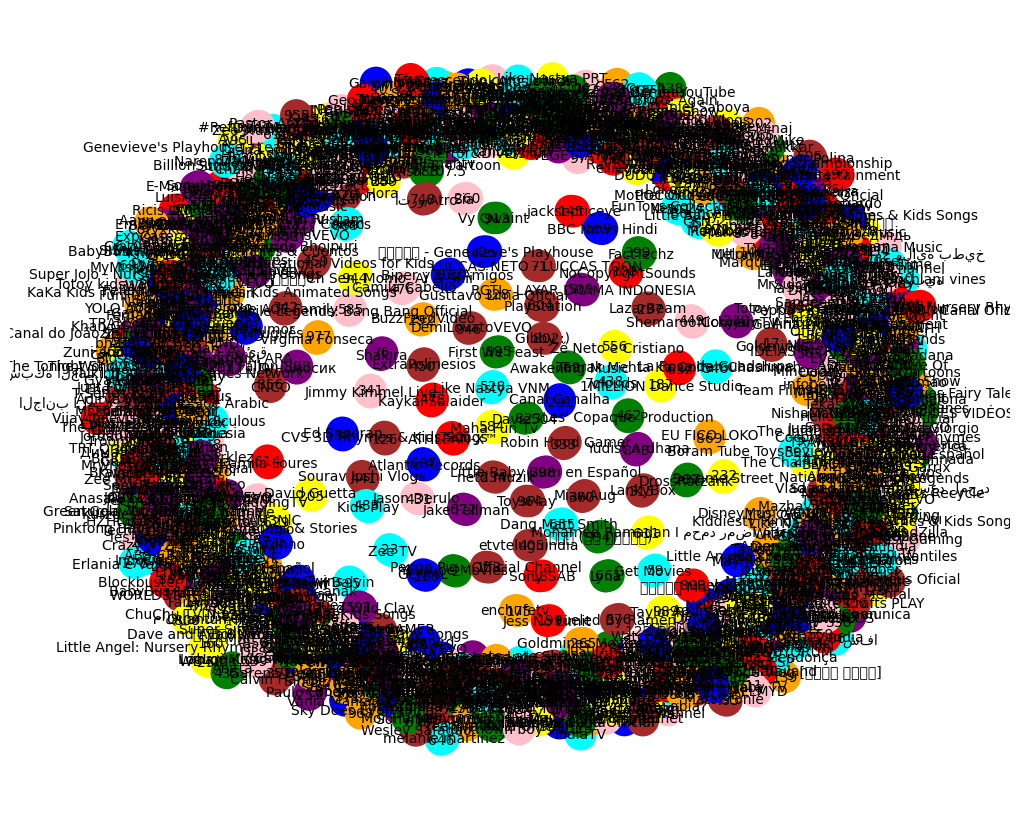

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import csv

# Path ke file CSV
file_path = "youtube.csv"  # Sesuaikan dengan path file Anda

# Membuat graph kosong
G = nx.Graph()

# Membaca file CSV dan menambahkan edge ke graph
with open(file_path, "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip header jika ada
    for row in reader:
        source, target = row[0], row[1]
        # Convert all node IDs to strings to ensure consistency
        G.add_edge(str(source), str(target)) # Convert to string before adding

# Menghitung komunitas dengan modularitas maksimal menggunakan algoritma greedy
communities = greedy_modularity_communities(G)

# Menampilkan jumlah komunitas dan anggota setiap komunitas
print("Jumlah komunitas dengan modularitas maksimal:", len(communities))
for i, community in enumerate(communities):
    print(f"Komunitas {i + 1}: {list(community)}")

# Visualisasikan jaringan dengan komunitas
color_map = []
colors = ["red", "blue", "green", "orange", "purple", "cyan", "yellow", "pink", "brown"]
for node in G.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(colors[i % len(colors)])

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=color_map, node_size=500, font_size=10)
plt.show()